# PID control of rover steering angle - coefficient tuning
## V. Venkatesh

In [2]:
import math
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import odeint

The acceleration balance equation is given by <br>
$\Huge{\Sigma \vec{F} = m \frac{d{\vec{v}}}{dt}}$

For a rover turning in the x-y plane with a steering angle $\psi$ and assuming friction is negligible, the vectors the above equation can be decomposed as <br>

$\Large{u\;cos(\psi) {F_p}  -  \rho C_d A v_x^2 = m \frac{d{{v_x}}}{dt}}$ <br>
$\Large{u\;sin(\psi) {F_p}  -  \rho C_d A v_y^2 = m \frac{d{{v_y}}}{dt}}$ <br>


For each $u$ and $\psi$, the system velocity response corresponding to $v_x$ and $v_y$ are computed. For a steering set-point $\psi_{SP}$, the error signal is defined as <br>
$\Large{e(t) = \psi_{SP} - tan^{-1}\frac{v_y(t)}{v_x(t)}}$

System input for the next time-step is computed using <br>
$\Large{u(t) = K_c e(t) + \frac{K_c}{\tau_I}e(t)}$

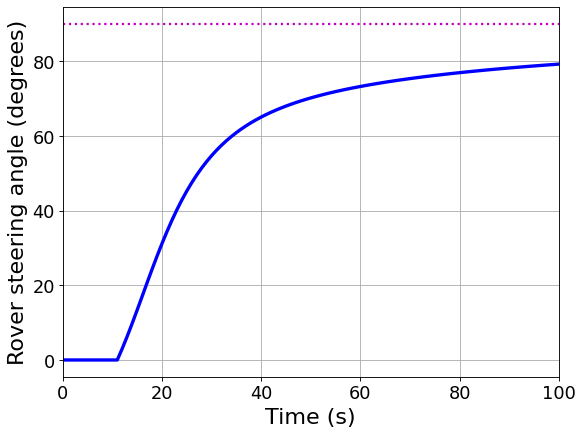

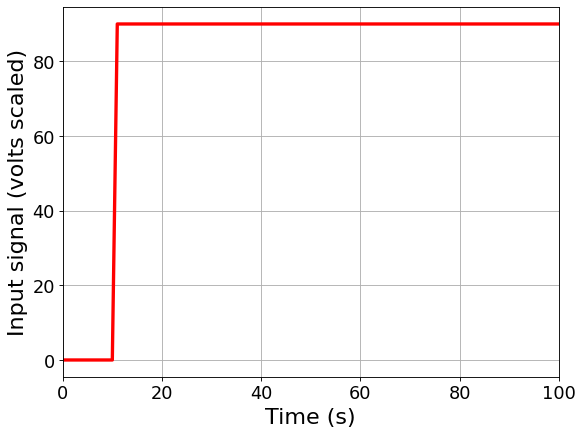

In [3]:
# Define a function that computes acceleration for a rover
def roverx(vx, t, u, psi):
    # Inputs
    # v - Speed of car in m/s
    # t - Time in seconds
    # u - Drive control signal fed to electric motor
    # load - Weight of passengers in the car
    Cd  = 0.24     # Drag coefficient
    rho = 1.225    # Density of air in kg/m^3
    A   = 5.0      # Cross-sectional area in m^2 that cuts through wind during motion
    Fp  = 30.0     # Thrust parameter in N/V
    m   = 500.0    # Mass of car in kg

    # Calculate acceleration
    dvx_by_dt = (1.0/(m)) * ((Fp * u * math.cos(psi/57.3)) - (0.5*rho*Cd*A*(vx**2)))
    return dvx_by_dt

def rovery(vy, t, u, psi):
    # Inputs
    # v - Speed of rover in m/s
    # t - Time in seconds
    # u - Drive control signal fed to electric motor
    # load - Weight of passengers in the car
    Cd  = 0.24     # Drag coefficient
    rho = 1.225    # Density of air in kg/m^3
    A   = 5.0      # Cross-sectional area in m^2 that cuts through wind during motion
    Fp  = 30.0     # Thrust parameter in N/V
    m   = 500.0    # Mass of car in kg

    # Calculate acceleration
    dvy_by_dt = (1.0/(m)) * ((Fp * u * math.sin(psi/57.3)) - (0.5*rho*Cd*A*(vy**2)))
    return dvy_by_dt


# Define a function that computes acceleration for a rover
def roverx(vx, t, u, psi):
    # Inputs
    # v - Speed of car in m/s
    # t - Time in seconds
    # u - Drive control signal fed to electric motor
    # load - Weight of passengers in the car
    Cd  = 0.24     # Drag coefficient
    rho = 1.225    # Density of air in kg/m^3
    A   = 0.5      # Cross-sectional area in m^2 that cuts through wind during motion
    Fp  = 30.0     # Thrust parameter in N/V
    m   = 3.0    # Mass of rover in kg

    # Calculate acceleration
    dvx_by_dt = (1.0/(m)) * ((Fp * u * math.cos(psi/57.3)) - (0.5*rho*Cd*A*(vx**2)))
    return dvx_by_dt

def rovery(vy, t, u, psi):
    # Inputs
    # v - Speed of car in m/s
    # t - Time in seconds
    # u - Drive control signal fed to electric motor
    # load - Weight of passengers in the car
    Cd  = 0.24     # Drag coefficient
    rho = 1.225    # Density of air in kg/m^3
    A   = 0.5      # Cross-sectional area in m^2 that cuts through wind during motion
    Fp  = 30.0     # Thrust parameter in N/V
    m   = 3.0    # Mass of rover in kg

    # Calculate acceleration
    dvy_by_dt = (1.0/(m)) * ((Fp * u * math.sin(psi/57.3)) - (0.5*rho*Cd*A*(vy**2)))
    return dvy_by_dt

# Initialization
tf = 1000
nsteps = 1001
delta_t = tf / (nsteps-1)
ts = np.linspace(0, tf, nsteps)


# Simulate step input to linear system
# Input  - step
# Initial velocity at time t=0 - v0
step = np.zeros(nsteps)
step[11:] = 90.0
u = 25.0
vx0 = 25.0
vy0 =  0.0
psi0 = 0.0
psi_store = np.zeros(nsteps) # This variable stores simulated output velocities
                             # but does nothing else
vx_store = np.zeros(nsteps)  # This variable stores simulated output velocities
                             # but does nothing else
vy_store = np.zeros(nsteps)  # This variable stores simulated output velocities
                             # but does nothing else


# Simulate response of linear system
# Output - v
for i in np.arange(nsteps-1):
    psi = step[i]

    vx = odeint(roverx, vx0, [0, delta_t], args=(u, psi))
    vy = odeint(rovery, vy0, [0, delta_t], args=(u, psi))
    vx0 = vx[-1]
    vy0 = vy[-1]
    vx_store[i+1]  = vx0
    vy_store[i+1]  = vy0
    psi_store[i+1] = 57.3*math.atan2(vy0,vx0)


# Visualize simulation results
# Plot system response and setpoint
vx0  = 0
vy0  = 0
psi0 = 0
fig1 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, psi_store, 'b', linewidth=3, label='Simulated')
plt.plot([0,tf], [90,90], 'm:', linewidth=2, label='Set point desired')
plt.xlim([0,100])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Rover steering angle (degrees)', fontsize=20)
plt.grid()

# Plot system input to electric motor drive
fig2 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, step, 'r', linewidth=3, label='Simulated')
plt.xlim([0,100])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Input signal (volts scaled)', fontsize=20)
plt.grid()

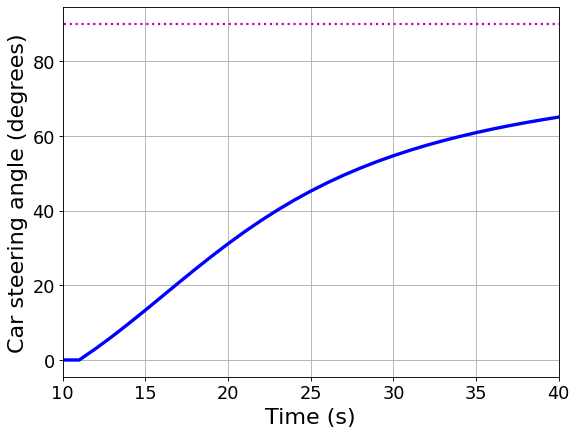

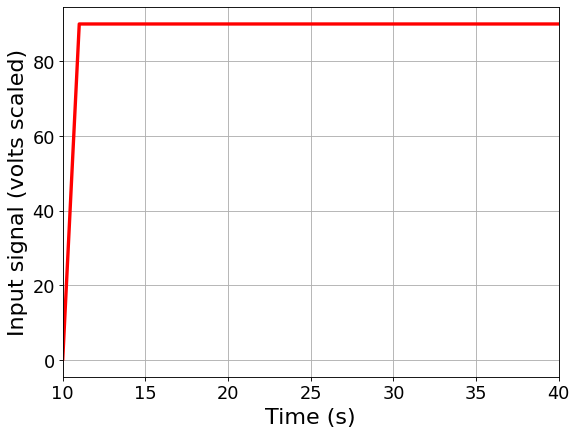

In [4]:
# For the rover, make zoomed in plots to allow estimation of theta_p and tau_p
# Visualize simulation results
# Plot system response and setpoint
vx0  = 0
vy0  = 0
psi0 = 0
fig1 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, psi_store, 'b', linewidth=3, label='Simulated')
plt.plot([0,tf], [90,90], 'm:', linewidth=2, label='Set point desired')
plt.xlim([10,40])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Rover steering angle (degrees)', fontsize=20)
plt.grid()

# Plot system input to electric motor drive
fig2 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, step, 'r', linewidth=3, label='Simulated')
plt.xlim([10,40])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Input signal (volts scaled)', fontsize=20)
plt.grid()

First, we perform computations for the rover. <br>

Proportional gain <br>
$K_p = \frac{\Delta{y}}{\Delta{u}}$
 $=\frac{}{}$=

Response delay at start <br>
Delay between start of output  𝑣(𝑡)  and input  𝑢(𝑡) <br>
𝜃𝑝  =

Response time constant <br>
Time taken to reach  $(1 -  \frac{1}{e})*v_{max}(t)$ <br>
$\tau_p = $

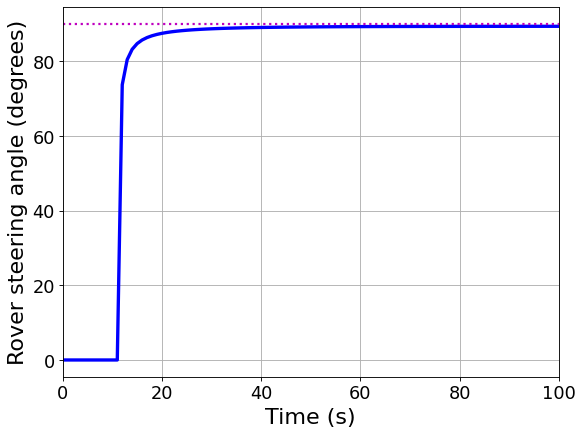

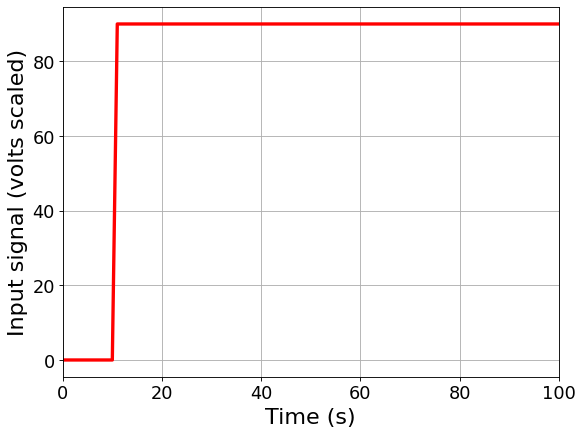

In [5]:
# Simulate response of linear system
# Output - v
for i in np.arange(nsteps-1):
    psi = step[i]

    vx = odeint(roverx, vx0, [0, delta_t], args=(u, psi))
    vy = odeint(rovery, vy0, [0, delta_t], args=(u, psi))
    vx0 = vx[-1]
    vy0 = vy[-1]
    vx_store[i+1]  = vx0
    vy_store[i+1]  = vy0
    psi_store[i+1] = 57.3*math.atan2(vy0,vx0)


# Visualize simulation results
# Plot system response and setpoint
vx0  = 0
vy0  = 0
psi0 = 0
fig1 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, psi_store, 'b', linewidth=3, label='Simulated')
plt.plot([0,tf], [90,90], 'm:', linewidth=2, label='Set point desired')
plt.xlim([0,100])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Rover steering angle (degrees)', fontsize=20)
plt.grid()

# Plot system input to electric motor drive
fig2 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, step, 'r', linewidth=3, label='Simulated')
plt.xlim([0,100])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Input signal (volts scaled)', fontsize=20)
plt.grid()

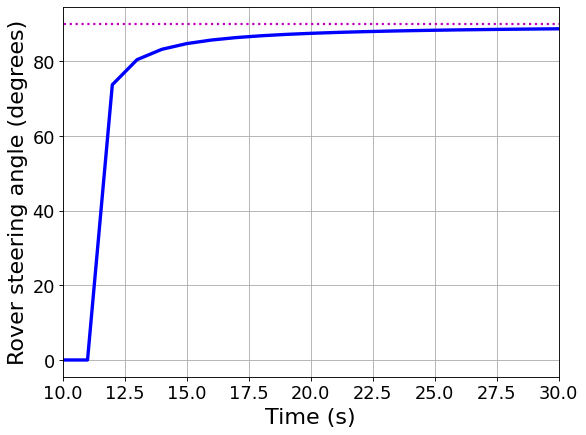

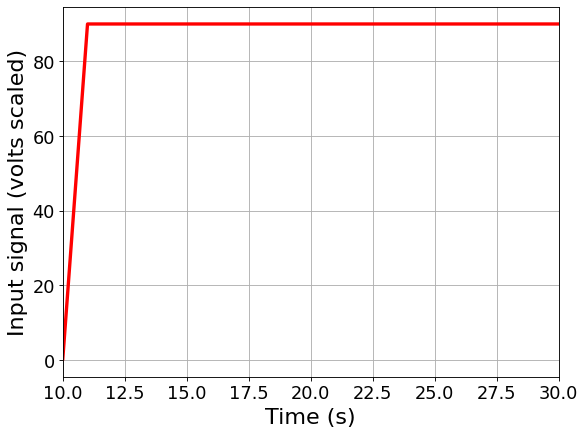

In [6]:
# For the rover, make zoomed in plots to allow estimation of theta_p and tau_p
vx0  = 0
vy0  = 0
psi0 = 0
fig1 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, psi_store, 'b', linewidth=3, label='Simulated')
plt.plot([0,tf], [90,90], 'm:', linewidth=2, label='Set point desired')
plt.xlim([10,30])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Rover steering angle (degrees)', fontsize=20)
plt.grid()

# Plot system input to electric motor drive
fig2 = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, step, 'r', linewidth=3, label='Simulated')
plt.xlim([10,30])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Input signal (volts scaled)', fontsize=20)
plt.grid()

Next, we perform computations for the rover <br>
Proportional gain <br>
$K_p = \frac{\Delta{y}}{\Delta{u}}$ $=\frac{}{}$= <br>

Response delay at start <br>
Delay between start of output 𝑣(𝑡) and input 𝑢(𝑡) <br>
𝜃𝑝 =

Response time constant <br>
Time taken to reach  $(1 -  \frac{1}{e})*v_{max}(t)$ <br>
$\tau_p = $

For small rovers, simulations show that dead-time is significant. The internal model control choice is made according to <br>
$K_c = \frac{\tau_p + 0.5 \theta_p}{\lambda K_p}$ <br>
$\tau_i = \tau_p + 0.5 \theta_p$

Differential gains are omitted altogether in this work because of its increased sensitivity to noise.